# Модель линейной регрессии 

### Задача

Представим, что у нас есть небольшое кафе.
Владелец заметил: чем больше денег он тратит на рекламу в соцсетях, тем больше посетителей приходит.

**Основной вопрос задачи:**
Можно ли предсказать количество посетителей в зависимости от рекламного бюджета?

In [8]:
import matplotlib.pyplot as plt
import numpy as np

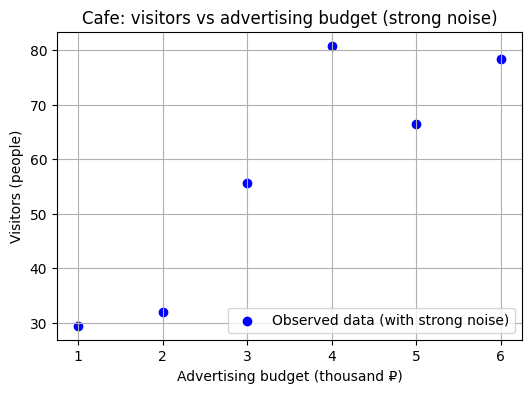

In [14]:
# Example: Cafe visitors vs advertising budget (with strong noise)
def true_function(x):
    return 12 * x + 10  


np.random.seed(42)  
X_obs = np.array([1, 2, 3, 4, 5, 6])
y_obs = true_function(X_obs) + np.random.normal(0, 15, size=len(X_obs)) 

X_true = np.linspace(0, 7, 100)
y_true = true_function(X_true)


plt.figure(figsize=(6,4))
plt.scatter(X_obs, y_obs, color="blue", label="Observed data (with strong noise)")
# plt.plot(X_true, y_true, color="green", linestyle="--", label="True relationship")

plt.xlabel("Advertising budget (thousand ₽)")
plt.ylabel("Visitors (people)")
plt.title("Cafe: visitors vs advertising budget (strong noise)")
plt.legend()
plt.grid(True)
plt.show()


### Как можно моделировать данные? 

Мы предполагаем, что целевая функция **Y** линейно зависит от аргументов плюс некоторое смещение **b** и шум **ε**:

$$
Y = a_0 X_0 + a_1 X_1 + a_2 X_2 + b + \varepsilon
$$

Это выражение описывает задачу **линейной регрессии**, где нужно найти коэффициенты $a_i$ и $b$.  
Модель можно обобщить, заменяя $X_i$ на другие признаки/преобразования — сложность не растёт,  
потому что неизвестные величины $a_i, b$ входят в выражение линейно.

(Опционально, краткая форма:)

$$
Y = \sum_{i=0}^{p-1} a_i X_i + b + \varepsilon
\quad\text{или}\quad
Y = \mathbf{a}^{\top}\mathbf{X} + b + \varepsilon
$$


### Как найти параметы a, b ?

#### Оптимизация функции потерь

Простейшая функция потерь для линейной регрессии — это среднеквадратичное отклонение (**MSE, Mean Squared Error**).  
Она измеряет, насколько предсказанные моделью значения отличаются от реальных.

Функция потерь записывается так:

$$
L(a, b) = \frac{1}{N} \sum_{i=1}^N \big( Y_i - (a X_i + b) \big)^2
$$

Где:
- $Y_i$ — реальные наблюдения,
- $X_i$ — входные данные,
- $a, b$ — параметры модели (наклон и сдвиг),
- $N$ — число наблюдений.

**Задача линейной регрессии**: найти такие $a$ и $b$, которые **минимизируют функцию потерь**.

Таким образом, обучение линейной регрессии сводится к задаче оптимизации:

$$
\min_{a, b} L(a, b)
$$


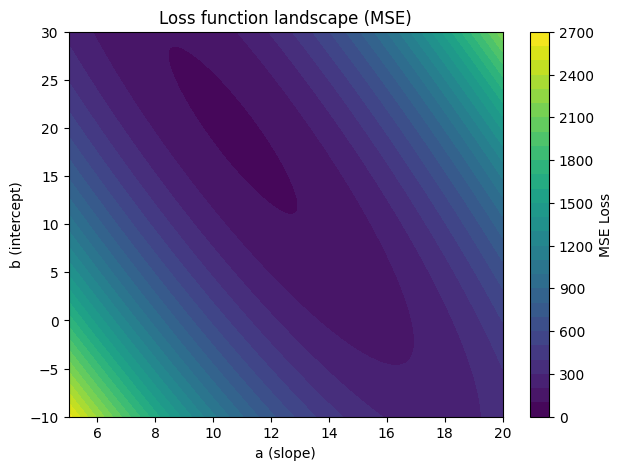

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def mse_loss(a, b, X, Y):
    Y_pred = a * X + b
    return np.mean((Y - Y_pred)**2)


a_vals = np.linspace(5, 20, 100)
b_vals = np.linspace(-10, 30, 100)

A, B = np.meshgrid(a_vals, b_vals)
Loss = np.zeros_like(A)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        Loss[i, j] = mse_loss(A[i, j], B[i, j], X_obs, y_obs)


plt.figure(figsize=(7,5))
contour = plt.contourf(A, B, Loss, levels=30, cmap="viridis")
plt.colorbar(contour, label="MSE Loss")
plt.xlabel("a (slope)")
plt.ylabel("b (intercept)")
plt.title("Loss function landscape (MSE)")
plt.show()


### Как найти коэффициенты линейной регрессии аналитически

Функция потерь (MSE) для линейной регрессии:

$$
L(a, b) = \sum_{i=1}^N \big( Y_i - (a X_i + b) \big)^2
$$

Чтобы найти минимум этой функции, берём **частные производные** по $a$ и $b$ и приравниваем их к нулю:

1. Производная по $a$:
$$
\frac{\partial L}{\partial a} = -2 \sum_{i=1}^N X_i \big( Y_i - (a X_i + b) \big) = 0
$$

2. Производная по $b$:
$$
\frac{\partial L}{\partial b} = -2 \sum_{i=1}^N \big( Y_i - (a X_i + b) \big) = 0
$$


После упрощения получаем **систему нормальных уравнений**:

$$
\sum_{i=1}^N X_i Y_i = a \sum_{i=1}^N X_i^2 + b \sum_{i=1}^N X_i
$$

$$
\sum_{i=1}^N Y_i = a \sum_{i=1}^N X_i + b \cdot N
$$

Эта система позволяет аналитически найти $a$ и $b$.


### Матричная форма нормальных уравнений

Полученную систему можно записать в **матричной форме**.  
Для этого добавим фиктивный признак $X_0 = 1$, чтобы сдвиг $b$ вошёл в вектор коэффициентов вместе с $a$.

Тогда модель примет вид:

$$
Y = X w + \varepsilon
$$

где  
- $Y$ — вектор наблюдений (размерности $N \times 1$),  
- $X$ — матрица признаков (размерности $N \times (p+1)$, первый столбец — единицы),  
- $w = \begin{bmatrix} b \\ a_1 \\ a_2 \\ \dots \\ a_p \end{bmatrix}$ — вектор коэффициентов,  
- $\varepsilon$ — шум.

Функция потерь в матричной форме:

$$
L(w) = \| Y - X w \|^2
$$

Для минимума нужно приравнять градиент к нулю:

$$
X^\top (Y - X w) = 0
$$

После преобразований получаем **нормальные уравнения**:

$$
X^\top X w = X^\top Y
$$

Решение (если $X^\top X$ обратима):

$$
w = (X^\top X)^{-1} X^\top Y
$$


### Линейная регрессия через метода Крамера

Когда у нас есть система уравнений вида

$$
A \cdot w = d,
$$

мы хотим найти вектор $w$ (например, коэффициенты $a$ и $b$ в линейной регрессии).  

Метод Крамера использует **геометрическую идею определителя**:  
- $\det(A)$ измеряет «объём» параллелепипеда, образованного её столбцами.  
- Если заменить один из столбцов на вектор правых частей $d$, то мы получаем новый параллелепипед.  
  Его «объём» показывает, как сильно правая часть тянет решение в своём направлении.  

Таким образом, отношение этих объёмов (новый / исходный) показывает, **какой вес должен получить соответствующий коэффициент**.

---

#### Применительно к линейной регрессии

Для прямой $y = ax + b$ система уравнений выглядит так:

$$
\begin{cases}
\sum_i X_i Y_i = a \sum_i X_i^2 + b \sum_i X_i, \\
\sum_i Y_i = a \sum_i X_i + b \cdot n,
\end{cases}
$$

где $n$ — число наблюдений.  

- Основная матрица $A$ содержит только суммы по $X$ (геометрия входных данных).  
- Вектор $d$ содержит суммы, где участвует $Y$ (как данные «тянут» модель).  
- Замена столбца на $d$ отвечает на вопрос: *если бы этот коэффициент «отвечал» за всё несоответствие, сколько бы он весил?*

---

#### Итог

Метод Крамера — это способ **разложить вклад правых частей системы по коэффициентам** через отношение «искажённых объёмов» к исходному объёму.  

В результате мы напрямую получаем:

$$
a = \frac{D_a}{D}, \qquad b = \frac{D_b}{D}.
$$

Это даёт простую формулу, которая особенно удобна при малом числе переменных (как в случае линейной регрессии с $a$ и $b$).


#### Кто так же как я забыл, суть метода Крамера, рекомендую: https://www.youtube.com/watch?v=jBsC34PxzoM

In [21]:
def cramer_regression(X, y):
    """
    Линейная регрессия (y = a*x + b) через метод Крамера.
    X - массив признаков (1D),
    y - массив ответов (1D).
    """
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * y)

    # Определитель основной матрицы
    D = n * sum_x2 - sum_x**2
    # Определители для a и b
    Da = n * sum_xy - sum_x * sum_y
    Db = sum_x2 * sum_y - sum_x * sum_xy

    a = Da / D
    b = Db / D
    return a, b

# Применяем метод Крамера
a_cramer, b_cramer = cramer_regression(X_obs, y_obs)
print(f"Коэффициенты по методу Крамера: a={a_cramer:.2f}, b={b_cramer:.2f}")

Коэффициенты по методу Крамера: a=10.69, b=19.75


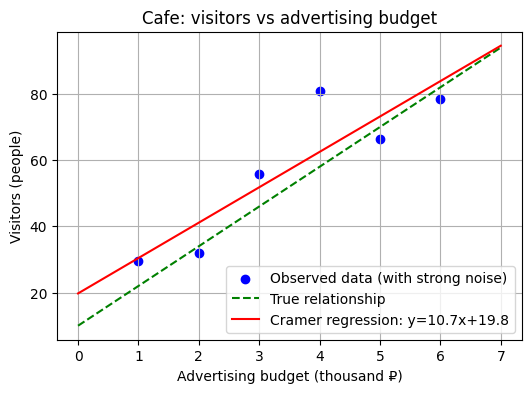

In [22]:

# Линия регрессии
y_pred = a_cramer * X_true + b_cramer

# --- Визуализация ---
plt.figure(figsize=(6,4))
plt.scatter(X_obs, y_obs, color="blue", label="Observed data (with strong noise)")
plt.plot(X_true, y_true, color="green", linestyle="--", label="True relationship")
plt.plot(X_true, y_pred, color="red", label=f"Cramer regression: y={a_cramer:.1f}x+{b_cramer:.1f}")

plt.xlabel("Advertising budget (thousand ₽)")
plt.ylabel("Visitors (people)")
plt.title("Cafe: visitors vs advertising budget")
plt.legend()
plt.grid(True)
plt.show()


## Линейная регрессия через SVD

Задача:
$$
\min_w \| y - Xw \|^2
$$

Обычно решается так:
$$
w = (X^\top X)^{-1} X^\top y
$$

⚠️ Но обращение $X^\top X$ может быть нестабильным.  

Поэтому используют **SVD**:
$$
X = U \Sigma V^\top
$$

Тогда псевдообратная:
$$
X^+ = V \Sigma^+ U^\top
$$

И решение:
$$
w = X^+ y = V \Sigma^+ U^\top y
$$

➡️ Это устойчивее и именно так работает `sklearn.LinearRegression`.


SVD solution: a = 10.6858, b = 19.7521
np.linalg.lstsq: a = 10.6858, b = 19.7521
MSE (SVD)     = 85.2150
MSE (lstsq)   = 85.2150


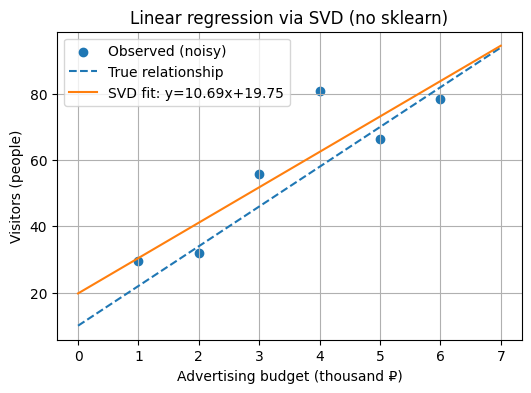

In [25]:
# Linear regression via SVD (no sklearn)

# ----- Build design matrix -----
# For y = a*x + b we use X_design = [1, x]
X_design = np.column_stack([np.ones_like(X_obs), X_obs])   # shape: (n, 2)

# ----- SVD-based solution -----
# X = U Σ V^T  =>  X^+ = V Σ^+ U^T  =>  w = X^+ y
U, S, VT = np.linalg.svd(X_design, full_matrices=False)    # U: (n,2), S: (2,), VT: (2,2)
# Build Σ^+ (reciprocal of non-zero singular values)
tol = np.finfo(float).eps * max(X_design.shape) * S[0]
S_inv = np.diag([1/s if s > tol else 0.0 for s in S])
# Compute weights
w = VT.T @ S_inv @ U.T @ y_obs

b_svd, a_svd = float(w[0]), float(w[1])

print(f"SVD solution: a = {a_svd:.4f}, b = {b_svd:.4f}")

# ----- Predictions -----
y_pred_svd = a_svd * X_true + b_svd

# (Optional) Compare to closed-form least squares (np.linalg.lstsq)
a_lstsq, b_lstsq = np.linalg.lstsq(X_design, y_obs, rcond=None)[0][1], np.linalg.lstsq(X_design, y_obs, rcond=None)[0][0]
print(f"np.linalg.lstsq: a = {a_lstsq:.4f}, b = {b_lstsq:.4f}")

# (Optional) MSE comparison
def mse(y, yhat): return np.mean((y - yhat)**2)
mse_svd   = mse(y_obs, a_svd*X_obs + b_svd)
mse_lstsq = mse(y_obs, a_lstsq*X_obs + b_lstsq)
print(f"MSE (SVD)     = {mse_svd:.4f}")
print(f"MSE (lstsq)   = {mse_lstsq:.4f}")

# ----- Plot -----
plt.figure(figsize=(6,4))
plt.scatter(X_obs, y_obs, label="Observed (noisy)")
plt.plot(X_true, y_true, linestyle="--", label="True relationship")
plt.plot(X_true, y_pred_svd, label=f"SVD fit: y={a_svd:.2f}x+{b_svd:.2f}")
plt.xlabel("Advertising budget (thousand ₽)")
plt.ylabel("Visitors (people)")
plt.title("Linear regression via SVD (no sklearn)")
plt.legend()
plt.grid(True)
plt.show()


### Решаем через sklearn

Cramer:   a = 10.6858, b = 19.7521
sklearn:  a = 10.6858, b = 19.7521


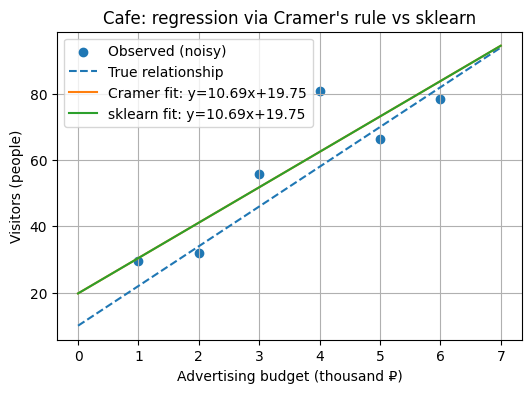

In [24]:

from sklearn.linear_model import LinearRegression


X_obs_2d = X_obs.reshape(-1, 1)
lin = LinearRegression().fit(X_obs_2d, y_obs)
a_sk = float(lin.coef_[0])       # slope
b_sk = float(lin.intercept_)     # intercept
y_pred_sk = a_sk * X_true + b_sk

print(f"Cramer:   a = {a_cramer:.4f}, b = {b_cramer:.4f}")
print(f"sklearn:  a = {a_sk:.4f}, b = {b_sk:.4f}")


plt.figure(figsize=(6,4))
plt.scatter(X_obs, y_obs, label="Observed (noisy)")
plt.plot(X_true, y_true, linestyle="--", label="True relationship")
plt.plot(X_true, y_pred, label=f"Cramer fit: y={a_cramer:.2f}x+{b_cramer:.2f}")
plt.plot(X_true, y_pred_sk, label=f"sklearn fit: y={a_sk:.2f}x+{b_sk:.2f}")
plt.xlabel("Advertising budget (thousand ₽)")
plt.ylabel("Visitors (people)")
plt.title("Cafe: regression via Cramer's rule vs sklearn")
plt.legend()
plt.grid(True)
plt.show()
